In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

In [2]:
from src.image_handler import *
from src.processing import *

## processing

#### Raw image

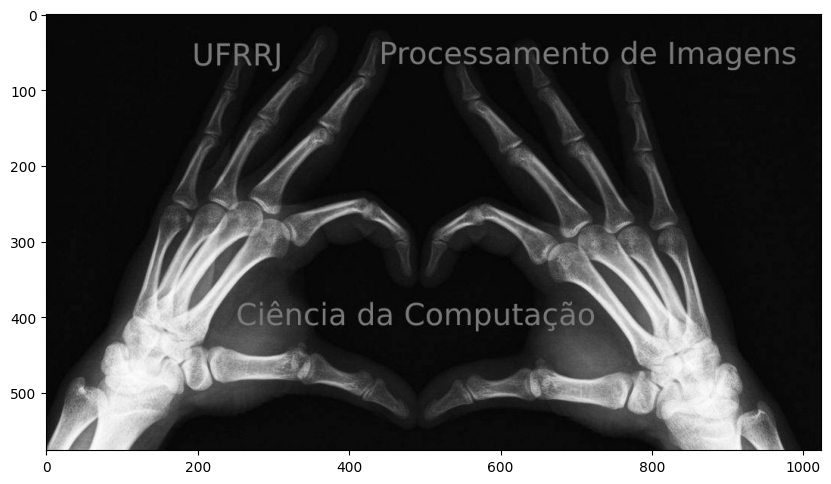

In [3]:
raw = read_image()
show(raw)

### Processing

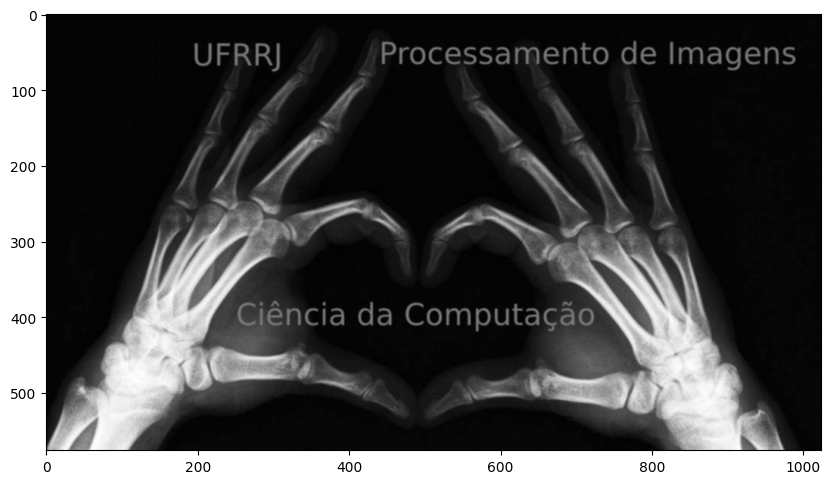

In [4]:
grey = get_greyscale(raw)
gauss = gaussian(grey, 3, 3)

show(gauss)

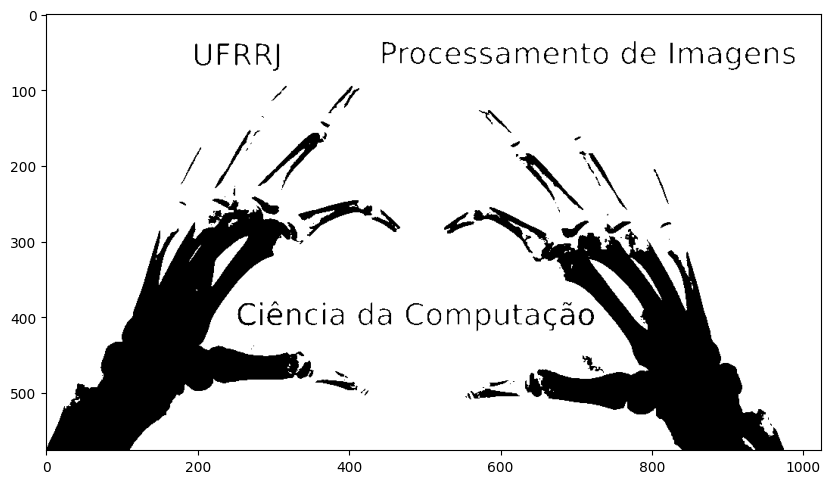

In [5]:
thres = thresholding(gauss)
#thres = gaussian_thresholding(grey)

show(thres)

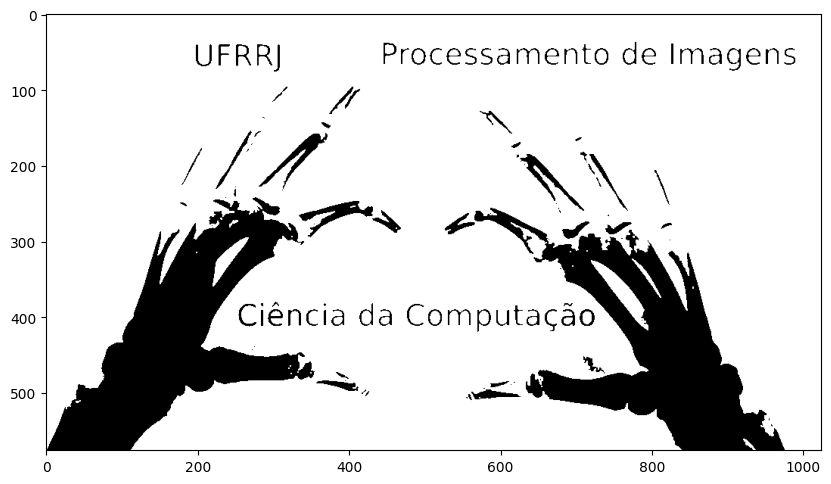

In [6]:
#processed = erode(thres, iterations=2)
processed = thres
processed = erode(processed, iterations=1)
processed = dilate(processed, iterations=1)

show(processed)

## Character Segmentation

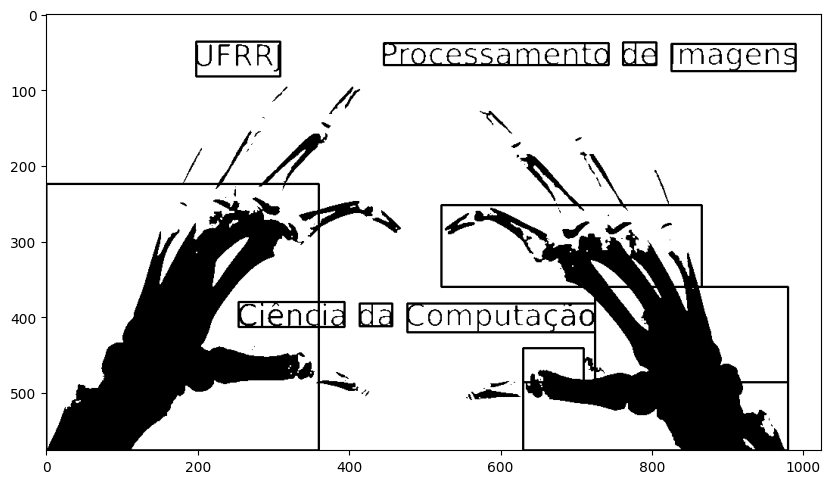

In [7]:
show(get_word_boxes(processed.copy()))

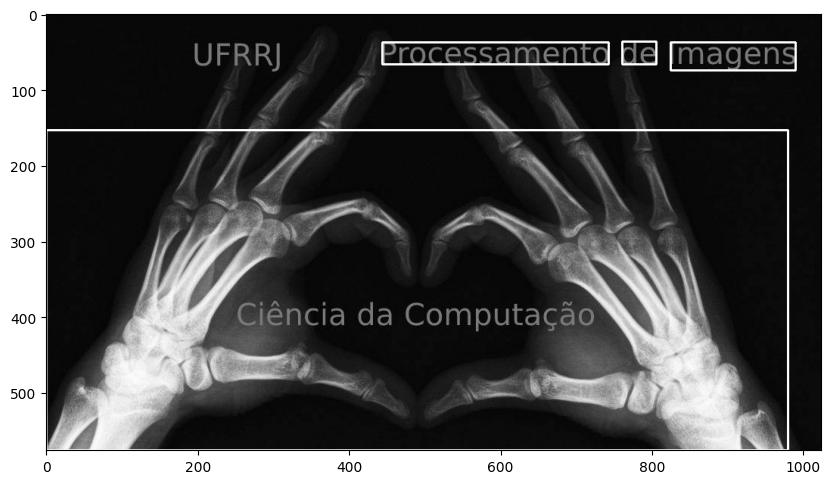

In [8]:
show(get_word_boxes(raw.copy(), (255,255,255)))

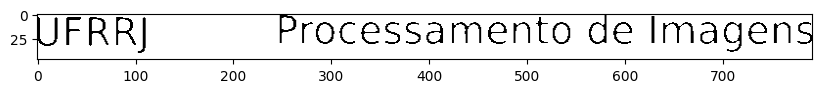

UFR

RJ

Processamento de Imagens



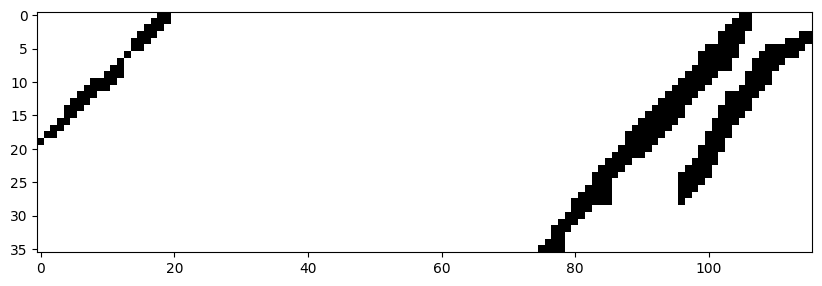

M



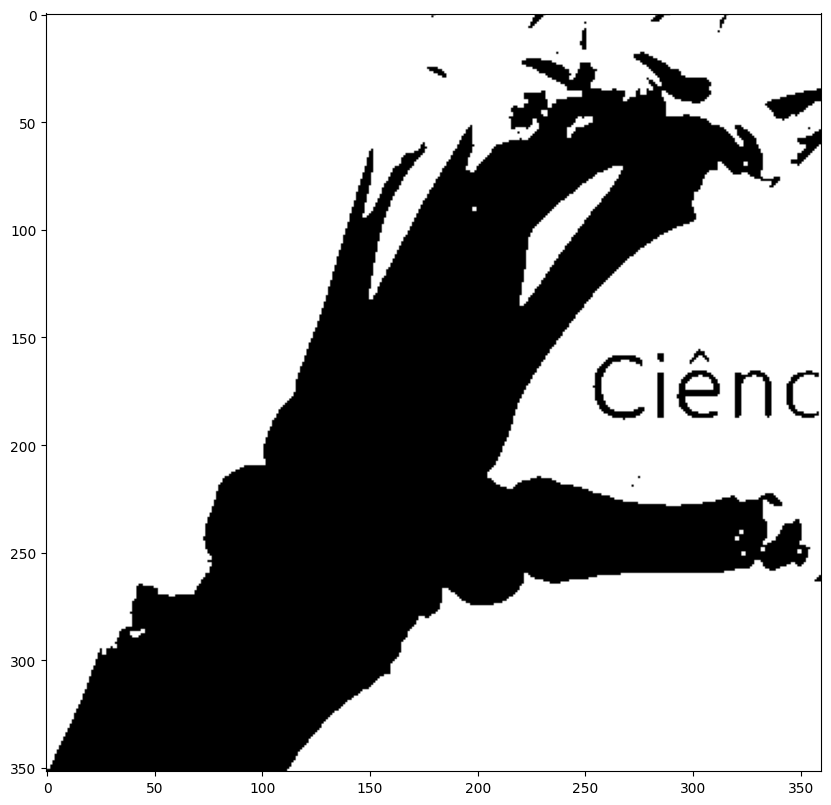

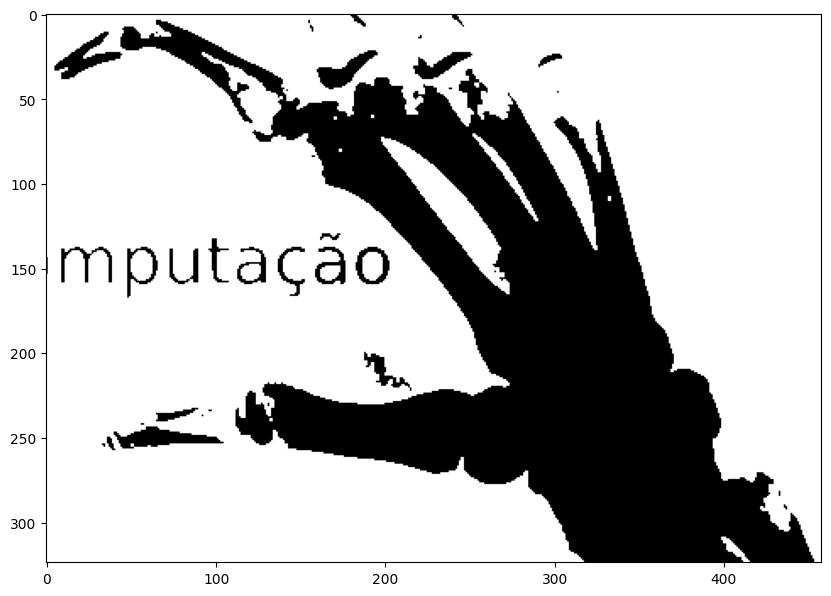

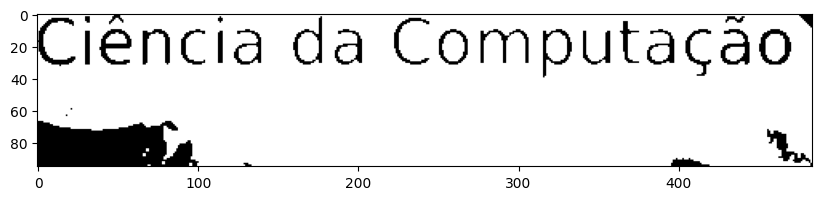

Ciência da Computação.
e E W



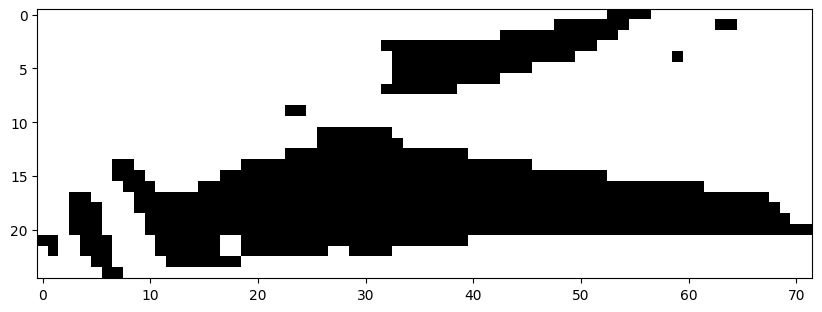

In [9]:
img_dict = get_data(processed)
segments = list()
segments_txt = list()

for i in range(len(img_dict['text'])):
    (x, y, w, h) = (img_dict['left'][i], img_dict['top'][i], img_dict['width'][i], img_dict['height'][i])
    crop_img = processed[y:y+h, x:x+w]
    if img_dict['level'][i] == 2:
        segments.append(crop_img)
        show(crop_img)
        #print(img_dict['text'][i])
        segment_txt = ocr(crop_img)
        segments_txt.append(segment_txt)
        print(segment_txt)

## OCRing

In [10]:
raw_text = ocr(raw)
processed_text = ocr(processed)
segmented_text = ' '.join(segments_txt)

## Postprocessing

### Raw image text

In [13]:
raw_text_pp = remove_double_spaces(' '.join(remove_special(raw_text)))
raw_text_pp = remove_single_letters(raw_text_pp, keep_e=True, keep_a=True)
print(raw_text_pp)

DN Processamento de Imagens AA 


### Processed image text

In [14]:
processed_text_pp = remove_double_spaces(' '.join(remove_special(processed_text)))
processed_text_pp = remove_single_letters(processed_text_pp, keep_e=True, keep_a=True)
print(processed_text_pp)

UFRR Processamento de Imagens CM Ciência da Computação   


### Processed and Segmented image text

In [17]:
segmented_text = remove_double_spaces(' '.join(remove_special(processed_text)))
segmented_text = remove_single_letters(segmented_text, keep_e=True, keep_a=True)
print(segmented_text)

UFRR Processamento de Imagens CM Ciência da Computação   
